In [2]:
import numpy as np
import pandas as pd
import sklearn 
import tensorflow as tf

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
df = pd.DataFrame( data = housing.data , columns= housing.feature_names )


In [147]:
df['target'] = housing.target

In [148]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,37.88,-122.23,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,37.86,-122.22,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,37.85,-122.24,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,37.85,-122.25,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,39.48,-121.09,0.781
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,39.49,-121.21,0.771
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,39.43,-121.22,0.923
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,39.43,-121.32,0.847


In [149]:
import seaborn as sns

C:\Users\msong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

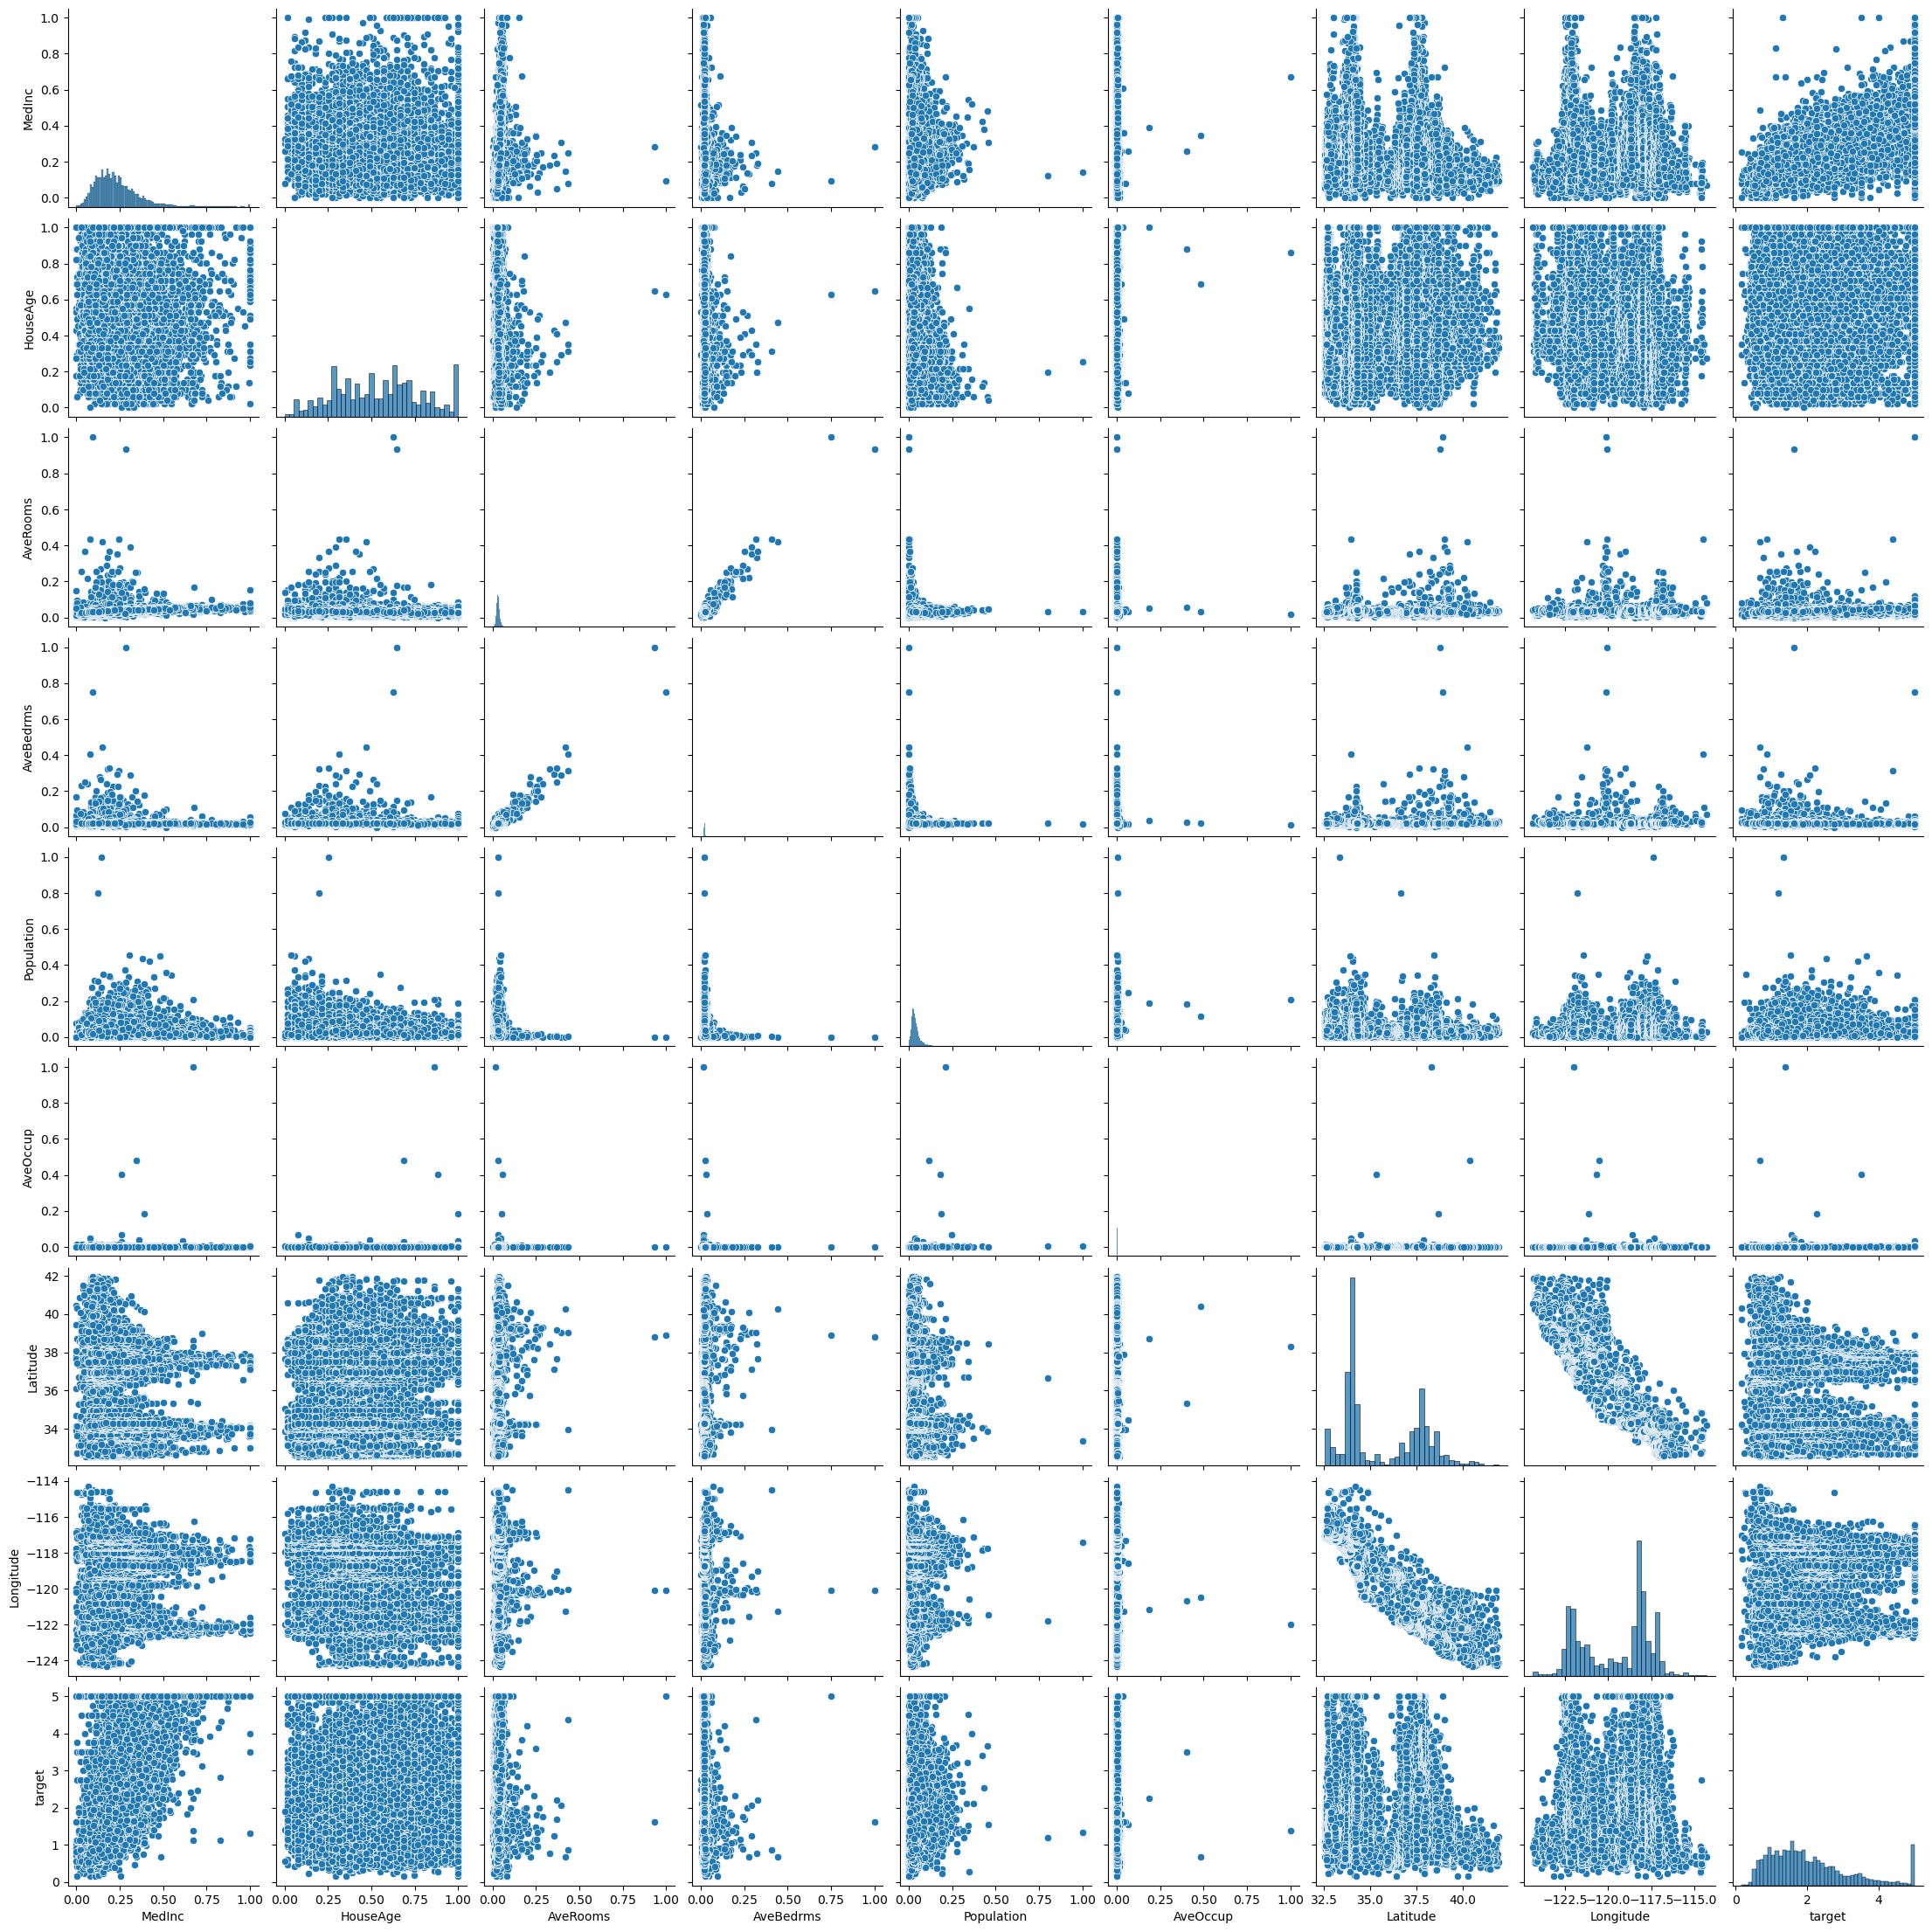

In [150]:
sns.pairplot( df )

In [18]:
df.corr()
#df.corr(method='kendall') << 여러가지 상관관계기법 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


## min-max normalizon

$$ \frac{x - \min{(x)} }{ max{(x)} - min{(x)}} $$


[1, 2, 3, 4, 5, 6] 

[0, 1, 2, 3, 4, 5]

[0., 0.2 ..... 1 ]

In [53]:
df[:3]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
column_to_scale = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaler = MinMaxScaler()
df[column_to_scale] = scaler.fit_transform( df[column_to_scale] )



In [152]:
df[:3]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521


In [153]:
test_df = df.sample(4000)
train_df = df.drop(test_df.index)

In [154]:
print( train_df.shape, test_df.shape )

(16640, 9) (4000, 9)


In [155]:
x_train = train_df.iloc[ :, :-1].to_numpy()
x_train.shape

x_test = test_df.iloc[ :, :-1].to_numpy()
x_test.shape

(4000, 8)

In [156]:
y_train = train_df.iloc[ :, -1:].to_numpy()
y_test = test_df.iloc[ :, -1:].to_numpy() 

In [157]:
print( y_train.shape, y_test.shape)

(16640, 1) (4000, 1)


In [158]:
# null model 

y_hat = y_train.mean()

# mse 

((y_test - y_hat) * (y_test - y_hat)).sum()  / len(y_test)

### 1.3783651446589975

1.305183224267175

In [159]:
from tensorflow.keras import layers

In [178]:


model = tf.keras.Sequential()

model.add( layers.Dense( 64 , activation= 'leaky_relu' ))
model.add( layers.Dense( 128 , activation= 'leaky_relu' ))
model.add( layers.Dense( 256 , activation= 'leaky_relu' ))
model.add( layers.Dense( 32 , activation= 'leaky_relu' ))
model.add( layers.Dense( 4 , activation= 'leaky_relu' ))
model.add( layers.Dense( 1 ))
     



In [179]:
model.compile( optimizer='adam', loss = 'mse' ) 

In [180]:
history = model.fit( x = x_train, y = y_train , epochs= 50) 

Epoch 1/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 2s 691us/step - loss: 1.3663
Epoch 2/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.5479
Epoch 3/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.5083
Epoch 4/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.4883
Epoch 5/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.4543
Epoch 6/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.4676
Epoch 7/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.4275
Epoch 8/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.4536
Epoch 9/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.4113
Epoch 10/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.4297
Epoch 11/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.4073
Epoch 12/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.4091
Epoch 13/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.3999
Epoch 14/50
520/520 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.3835
Epoch 15/50
520/520 ━━━━━━━━━

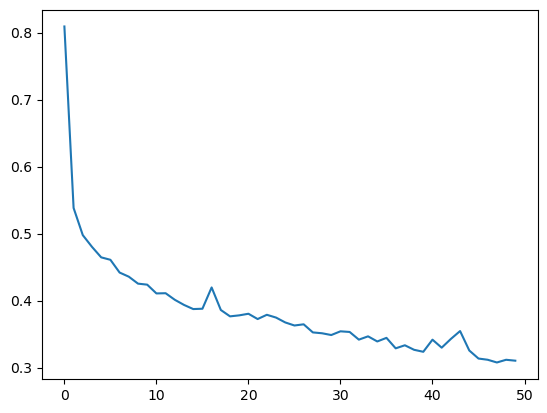

In [190]:
plt.plot(history.history['loss'])

In [173]:
predicted_value = model.predict( x_test ) 

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step


In [174]:
predicted_value.shape

(4000, 1)

In [175]:
y_test.shape

(4000, 1)

In [176]:
((predicted_value - y_test) * (predicted_value - y_test)).sum() / len(y_test)

0.30093326411652754

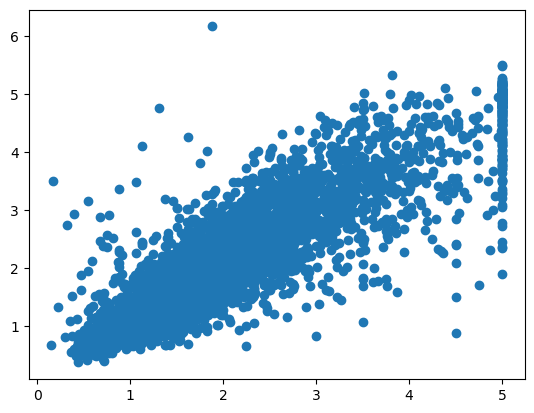

In [177]:
plt.scatter( x= y_test , y = predicted_value )

In [169]:
import matplotlib.pyplot as plt

(array([ 694., 2842., 3333., 3063., 2264., 1452., 1003.,  602.,  408.,
         979.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

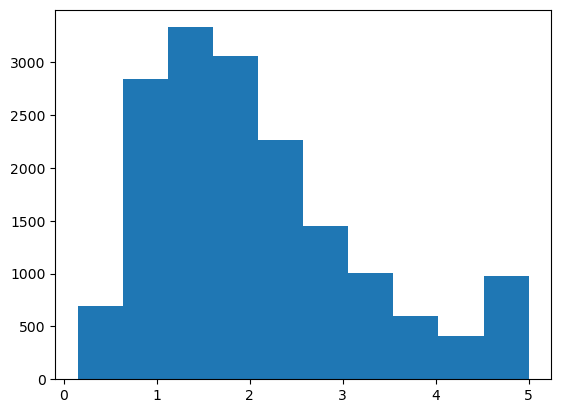

In [85]:
plt.hist( y_train ) 